In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_datareader as dr
import math
import statistics

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from random import random
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Stock Market

In [7]:
market = dr.data.get_data_yahoo('^GSPC', start = '2021-1-1', end= '2021-5-6')
market

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,3769.989990,3662.709961,3764.610107,3700.649902,5006680000,3700.649902
2021-01-05,3737.830078,3695.070068,3698.020020,3726.860107,4582620000,3726.860107
2021-01-06,3783.040039,3705.340088,3712.199951,3748.139893,6049970000,3748.139893
2021-01-07,3811.550049,3764.709961,3764.709961,3803.790039,5080870000,3803.790039
2021-01-08,3826.689941,3783.600098,3815.050049,3824.679932,4764180000,3824.679932
...,...,...,...,...,...,...
2021-04-30,4198.100098,4174.850098,4198.100098,4181.169922,4273680000,4181.169922
2021-05-03,4209.390137,4188.029785,4191.979980,4192.660156,4061170000,4192.660156
2021-05-04,4179.040039,4128.589844,4179.040039,4164.660156,4441080000,4164.660156


In [8]:
close = market['Close']
close.head()

Date
2021-01-04    3700.649902
2021-01-05    3726.860107
2021-01-06    3748.139893
2021-01-07    3803.790039
2021-01-08    3824.679932
Name: Close, dtype: float64

In [9]:
x = round(np.mean(close),2)
x

3947.67

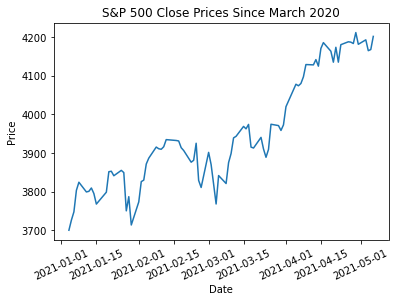

In [10]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Close Prices Since March 2020')
plt.xticks(rotation=25)
plt.plot(close)
plt.show()

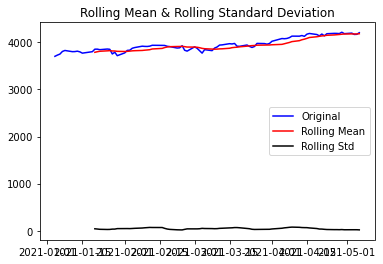

In [11]:
rolling_mean = close.rolling(window = 12).mean()
rolling_std = close.rolling(window = 12).std()
plt.plot(close, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

As it can be seen the rolling mean and rolling standard deviation stay constant over time. Therefore it can be concluded that the time series is stationary.

In [12]:
model = ARIMA(close, order=(4,0,1))
model_fit = model.fit()
results = model_fit.predict(len(close), len(close))
print(results)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


86    4199.008032
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# Interest Rates

In [19]:
df = dr.data.get_data_yahoo('^TNX', start = '2021-3-1', end= '2021-5-6')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,1.653,1.622,1.642,1.631,0.0,1.631
2021-05-03,1.651,1.578,1.651,1.607,0.0,1.607
2021-05-04,1.603,1.557,1.603,1.592,0.0,1.592
2021-05-05,1.626,1.582,1.607,1.584,0.0,1.584
2021-05-06,1.591,1.557,1.577,1.561,0.0,1.561


In [15]:
rates = df['Close']
rates.head()

Date
2021-03-01    1.446
2021-03-02    1.415
2021-03-03    1.470
2021-03-04    1.550
2021-03-05    1.554
Name: Close, dtype: float64

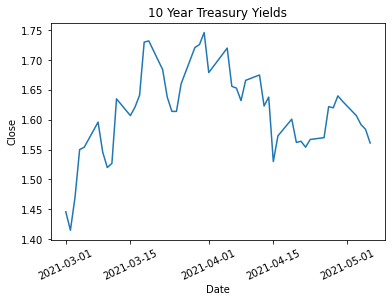

In [16]:
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('10 Year Treasury Yields')
plt.xticks(rotation=25)
plt.plot(rates)
plt.show()

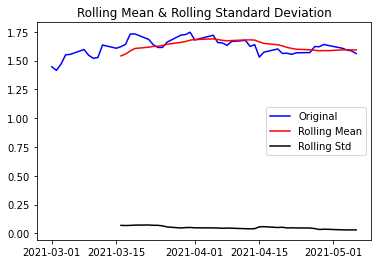

In [17]:
rolling_mean = rates.rolling(window = 12).mean()
rolling_std = rates.rolling(window = 12).std()
plt.plot(rates, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

As it can be seen the rolling mean and rolling standard deviation stay constant over time. Therefore it can be concluded that the time series is stationary.

In [18]:
rates_model = ARIMA(rates, order=(4,0,1))
rates_model_fit = rates_model.fit()
rates_results = rates_model_fit.predict(len(rates), len(rates))

print(rates_results)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


48    1.568787
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


# Unemployment Rate

In [17]:
os.chdir(r'C:\Users\robtu\Downloads')

In [25]:
ur_claims = pd.read_csv('ur_claims_data.csv')
x = ur_claims['UNRATE']
y = ur_claims['Average_Claims']

In [26]:
ur_claims

,DATE,UNRATE,Average_Claims
0,1/1/2020,3.5,211250
1,2/1/2020,3.5,212200
2,3/1/2020,4.4,2344000
3,4/1/2020,14.8,4667750
4,5/1/2020,13.3,2148000
5,6/1/2020,11.1,1476250
6,7/1/2020,10.2,1384250
7,8/1/2020,8.4,918600
8,9/1/2020,7.8,851000
9,10/1/2020,6.9,789200


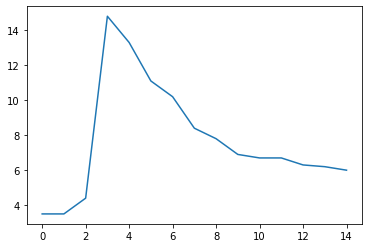

In [28]:
plt.plot(x)

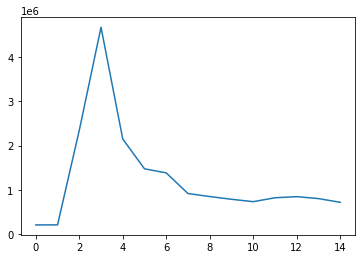

In [29]:
plt.plot(y)

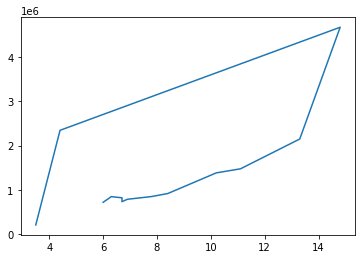

In [33]:
plt.plot(x,y)